In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from OSGridConverter import latlong2grid

%matplotlib inline

In [324]:
bikes = pd.read_csv('bikes_data.csv')

In [325]:
bikes.head()

,id,name,lat,long,updatedDate,numBikes,numEmptyDocks,installed,locked,installedDate
0,1,"River Street , Clerkenwell",51.529163,-0.109971,2020-10-02 11:31:00,11,7,True,False,2010-07-12 16:08:00
1,2,"Phillimore Gardens, Kensington",51.499607,-0.197574,2020-10-02 11:31:00,6,31,True,False,2010-07-08 11:43:00
2,3,"Christopher Street, Liverpool Street",51.521284,-0.084606,2020-10-02 11:31:00,7,25,True,False,2010-07-04 11:46:00
3,4,"St. Chad's Street, King's Cross",51.530059,-0.120974,2020-10-02 11:31:00,19,2,True,False,2010-07-04 11:58:00
4,5,"Sedding Street, Sloane Square",51.493130,-0.156876,2020-10-02 11:31:00,14,12,True,False,2010-07-04 12:04:00


In [326]:
# Converting the logitude and Latitude numbers to Eastings and Westings numbers which can work with my map below:

bikes['eastings'] = bikes.apply(lambda x: latlong2grid(x.lat, x.long).E, axis=1)
bikes['northings'] = bikes.apply(lambda x: latlong2grid(x.lat, x.long).N, axis=1)

In [327]:
bikes.head()

,id,name,lat,long,updatedDate,numBikes,numEmptyDocks,installed,locked,installedDate,eastings,northings
0,1,"River Street , Clerkenwell",51.529163,-0.109971,2020-10-02 11:31:00,11,7,True,False,2010-07-12 16:08:00,531203,182832
1,2,"Phillimore Gardens, Kensington",51.499607,-0.197574,2020-10-02 11:31:00,6,31,True,False,2010-07-08 11:43:00,525208,179392
2,3,"Christopher Street, Liverpool Street",51.521284,-0.084606,2020-10-02 11:31:00,7,25,True,False,2010-07-04 11:46:00,532985,182001
3,4,"St. Chad's Street, King's Cross",51.530059,-0.120974,2020-10-02 11:31:00,19,2,True,False,2010-07-04 11:58:00,530437,182912
4,5,"Sedding Street, Sloane Square",51.493130,-0.156876,2020-10-02 11:31:00,14,12,True,False,2010-07-04 12:04:00,528050,178742


In [328]:
# Getting the East and North min/max co-ordinates that the London Map uses for the bikes
# I will use these later to just plot the area of a zoomed in graph to show only the area where there are bikes

print('Eastings Min:', bikes['eastings'].min())
xmin = bikes['eastings'].min()
print('Eastings Max:', bikes['eastings'].max())
xmax = bikes['eastings'].max()
print('Northings Min:', bikes['northings'].min())
ymin = bikes['northings'].min()
print('Northings Max:', bikes['northings'].max())
ymax = bikes['northings'].max()

Eastings Min: 522501
Eastings Max: 538733
Northings Min: 174408
Northings Max: 185252


In [329]:
lon_map = gpd.read_file('London-wards-2014/ESRI/London_Ward_CityMerged.shp')

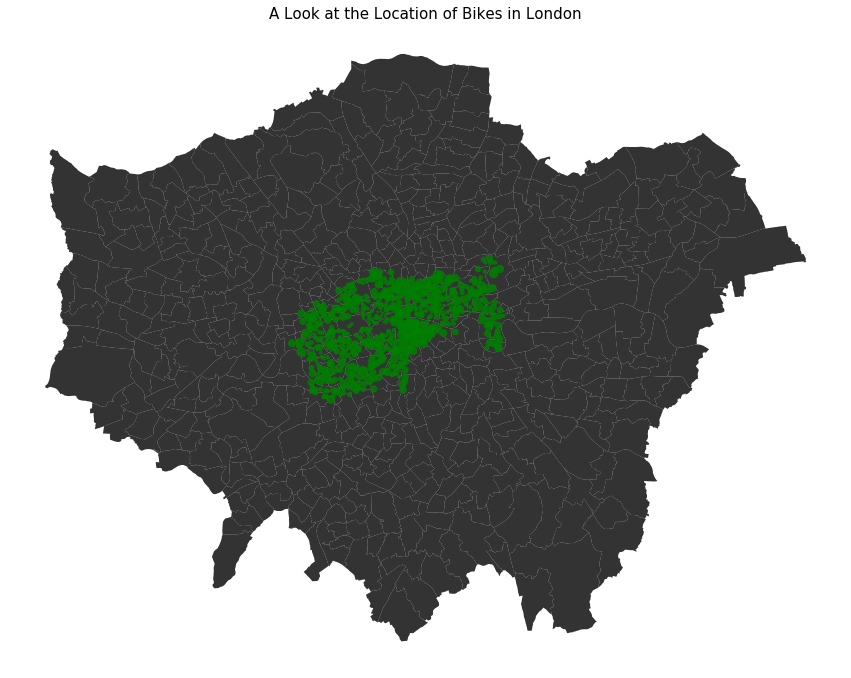

In [330]:
fig, ax = plt.subplots(figsize = (15,15))
lon_map.plot(ax = ax, color = 'black', alpha = 0.8)

y = np.random.random(10)
plt.scatter(bikes['eastings'], bikes['northings'], marker = "o", 
           c = 'green', alpha = 0.8, s = bikes['numBikes']*2)

plt.axis('off')
plt.title('A Look at the Location of Bikes in London', fontsize = 15)
plt.show();

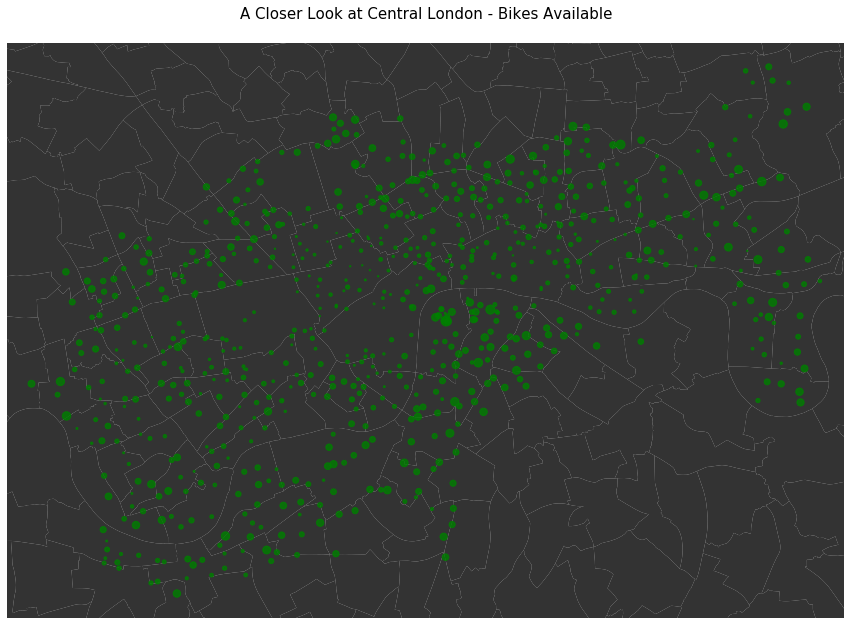

In [331]:
fig, ax = plt.subplots(figsize = (15,15))
lon_map.plot(ax = ax, color = 'black', alpha = 0.8)

y = np.random.random(10)
plt.scatter(bikes['eastings'], bikes['northings'], marker = "o", 
           c = 'green', alpha = 0.8, s = bikes['numBikes']*2)

plt.xlim(xmin-500, xmax+500)
plt.ylim(ymin-500, ymax+500)

plt.axis('off')
plt.title('A Closer Look at Central London - Bikes Available\n', fontsize = 15)
plt.show();

In [341]:
def split_names(names):
    name = names.split(',')
    return name[0].strip()

In [342]:
bikes['street_name'] = bikes.name.map(split_names)

In [343]:
bikes.head()

,id,name,lat,long,updatedDate,numBikes,numEmptyDocks,installed,locked,installedDate,eastings,northings,street_name
0,1,"River Street , Clerkenwell",51.529163,-0.109971,2020-10-02 11:31:00,11,7,True,False,2010-07-12 16:08:00,531203,182832,River Street
1,2,"Phillimore Gardens, Kensington",51.499607,-0.197574,2020-10-02 11:31:00,6,31,True,False,2010-07-08 11:43:00,525208,179392,Phillimore Gardens
2,3,"Christopher Street, Liverpool Street",51.521284,-0.084606,2020-10-02 11:31:00,7,25,True,False,2010-07-04 11:46:00,532985,182001,Christopher Street
3,4,"St. Chad's Street, King's Cross",51.530059,-0.120974,2020-10-02 11:31:00,19,2,True,False,2010-07-04 11:58:00,530437,182912,St. Chad's Street
4,5,"Sedding Street, Sloane Square",51.493130,-0.156876,2020-10-02 11:31:00,14,12,True,False,2010-07-04 12:04:00,528050,178742,Sedding Street


In [337]:
def nearest_bikes(street_name): 
    fig, ax = plt.subplots(figsize = (15,15))
    
    # Plotting the map first
    lon_map.plot(ax = ax, color = 'black', alpha = 0.8)

    # Plotting the scatter plots on the same axis for available bikes and docks
    plt.scatter(bikes['eastings'], bikes['northings'], marker = "o", 
               c = 'green', alpha = 0.8, s = bikes['numBikes']*20,
               edgecolors = 'white', label = 'Available Bikes')
    
    plt.scatter(bikes['eastings'], bikes['northings']-30, marker = "o", 
               c = 'orange', alpha = 0.8, s = bikes['numEmptyDocks']*20,
               edgecolors = 'white', label = 'Available Docks')
    
    # Creating lists to iterate through later to assign labels to just the points shown in the zoomed in map
    # This saves time by not labelling every point in the data set
    x = bikes['eastings'].to_list()
    y = bikes['northings'].to_list()
    labels = bikes['street_name'].to_list()
    
    # Calcs x and y limits based on your named street as the center        
    xmin = (bikes[bikes['street_name'] == street_name].eastings.sum())-500
    xmax = (bikes[bikes['street_name'] == street_name].eastings.sum())+500
    ymin = (bikes[bikes['street_name'] == street_name].northings.sum())-500
    ymax = (bikes[bikes['street_name'] == street_name].northings.sum())+500
    
    for _x,_y,_labels in zip(x,y,labels):
        if (_x >xmin) & (_x <xmax) & (_y>ymin) & (_y<ymax):
            plt.text(_x+15, _y-10, _labels, color = 'white', horizontalalignment='left')
    
    # Plotting a text box to show where you are currently
    plt.text(xmin+500, ymin+530, 'You Are Here' , fontsize = 15, color = 'white', 
             horizontalalignment='center', bbox=dict(facecolor='red', alpha=0.2))

    
    
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    plt.title(street_name + " - Bikes Available within 500 Feet\n", fontsize = 15)
    
    plt.legend(loc = 'best', fontsize = 12, markerscale = 0.5)
    plt.axis('off')
    plt.show();
    


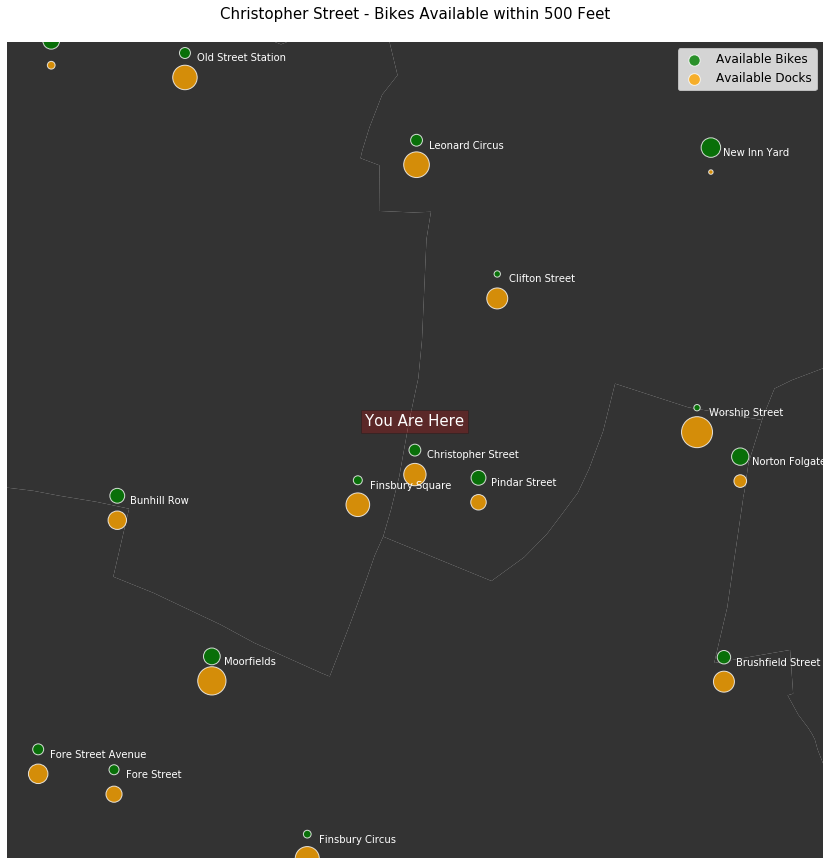

In [338]:
nearest_bikes('Christopher Street')

In [344]:
bikes['street_name'].to_list()

['River Street',
 'Phillimore Gardens',
 'Christopher Street',
 "St. Chad's Street",
 'Sedding Street',
 'Broadcasting House',
 'Charlbert Street',
 'Maida Vale',
 'New Globe Walk',
 'Park Street',
 'Brunswick Square',
 'Malet Street',
 'Scala Street',
 'Belgrove Street',
 'Great Russell Street',
 'Cartwright Gardens',
 'Hatton Wall',
 'Drury Lane',
 'Taviton Street',
 'Drummond Street',
 'Northington Street',
 'Red Lion Square',
 'British Museum',
 'Doric Way',
 'Ampton Street',
 'Bouverie Street',
 'Bolsover Street',
 'Hereford Road',
 'Windsor Terrace',
 'Fanshaw Street',
 'Leonard Circus',
 'Central House',
 'Pancras Road',
 'De Vere Gardens',
 'Penywern Road',
 'Abingdon Villas',
 'Shoreditch High Street',
 'Commercial Street',
 'Pindar Street',
 'Wenlock Road',
 'Crawford Street',
 'Boston Place',
 'Nesham Street',
 'Warwick Avenue Station',
 'Godliman Street',
 'Curzon Street',
 'East Road',
 'Finsbury Library',
 'Roscoe Street',
 'Grafton Street',
 'Golden Lane',
 'Finsbury Cir

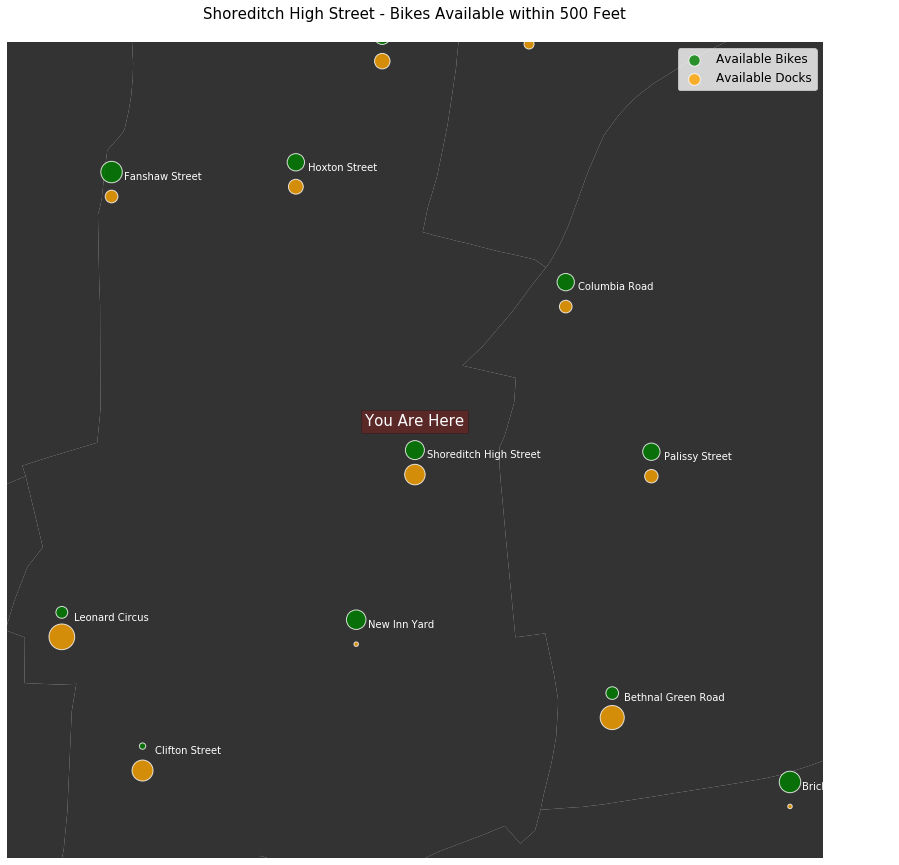

In [340]:
nearest_bikes('Shoreditch High Street')